# Mining multiple pathogen-host protein interactomes for the detection of shared patterns.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Mining-multiple-pathogen-host-protein-interactomes-for-the-detection-of-shared-patterns." data-toc-modified-id="Mining-multiple-pathogen-host-protein-interactomes-for-the-detection-of-shared-patterns.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mining multiple pathogen-host protein interactomes for the detection of shared patterns.</a></span></li><li><span><a href="#Data-collection-and-exploration" data-toc-modified-id="Data-collection-and-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data collection and exploration</a></span><ul class="toc-item"><li><span><a href="#Protein-protein-interaction-data-sources" data-toc-modified-id="Protein-protein-interaction-data-sources-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Protein-protein interaction data sources</a></span><ul class="toc-item"><li><span><a href="#Data-filtering-and-clean-up" data-toc-modified-id="Data-filtering-and-clean-up-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data filtering and clean-up</a></span></li><li><span><a href="#Taxonomic-diversity-of-data-set" data-toc-modified-id="Taxonomic-diversity-of-data-set-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Taxonomic diversity of data set</a></span><ul class="toc-item"><li><span><a href="#Inter-viral-interactions" data-toc-modified-id="Inter-viral-interactions-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>Inter-viral interactions</a></span></li></ul></li><li><span><a href="#Protein-diversity" data-toc-modified-id="Protein-diversity-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Protein diversity</a></span></li></ul></li><li><span><a href="#Annotation-data" data-toc-modified-id="Annotation-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Annotation data</a></span><ul class="toc-item"><li><span><a href="#Gene-Ontology" data-toc-modified-id="Gene-Ontology-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Gene Ontology</a></span></li><li><span><a href="#Number-of-columns-in-data-set" data-toc-modified-id="Number-of-columns-in-data-set-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Number of columns in data set</a></span></li><li><span><a href="#Retrieve-data-sources" data-toc-modified-id="Retrieve-data-sources-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Retrieve data sources</a></span></li><li><span><a href="#Number-of-Entrez-genes" data-toc-modified-id="Number-of-Entrez-genes-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Number of Entrez genes</a></span></li></ul></li><li><span><a href="#Check-overlap-between-data-sets" data-toc-modified-id="Check-overlap-between-data-sets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check overlap between data sets</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Data collection and exploration

In [1]:
import os, sys
# setup correct path to script files
from pathlib import Path
my_file = Path("main.py")
if not my_file.is_file():
    import sys,os
    os.chdir('../src/ppi_tools/')
    sys.path.append('../src/')
sys.path.append(os.path.abspath('..'))    

import argparse
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from IPython.display import display, HTML # pretty tables

import id_mapper
import label_go
import label_interpro
import ppi_import
from data_prep import retrieve_taxids
from go_tools import gaf_parser
from go_tools import obo_tools

In [2]:
# %%capture
# run main script to annotate and convert PPI datasets into a format suitable for frequent item set mining.
# and suppress output
%run main.py -d

Read PPI data set VirHostNet2 from ../../data/raw/ppi_data/VirHostNet_January_2017.txt.
Read PPI data set HPIDB2 from ../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt.
Read PPI data set PHISTO from ../../data/raw/ppi_data/phisto_Jan19_2017.csv.
Concatenating PPI datasets...
Converted all found identifiers to UniProt ACs.
Omitted 460 PPIs due to the existance of multiple mappings.
Omitting intra-species interactions...

Data source sizes:

origin
HPIDB2         55045
PHISTO          7946
VirHostNet2    21482
dtype: int64

Number of duplicated interactions on raw datasets
41838

Number of unique interactions per raw data set
origin
HPIDB2         41658
PHISTO          6521
VirHostNet2    18731
Name: xref_partners_sorted, dtype: int64

Number of interactions without UniProt AC
origin
HPIDB2         2718
VirHostNet2    1811
dtype: int64

Omitting duplicates as defined by UniProt ACs and taxids.
Retrieving Herpes taxids from ../../data/interim/child_taxids_of_10292.txt
Omitting al


Number of interactions for each pathogen grouping
pathogen_groups
bovine_ah1        33
epstein_barr    4656
equid_av1         16
equid_gv2          4
gallid_av2        21
human_av2         26
human_av3        101
human_bv5        160
human_bv6A         4
human_bv6B         3
human_gv8        806
human_hsv1       990
murid_bv1         58
murid_gv4        409
papiine_gv1        4
saimiri_gv2        9
suid_av1          61
dtype: int64
Adding InterPro annotations...


## Protein-protein interaction data sources
The protein-protein interaction (PPI) datasets were retrieved from the following sources.

- The HPIDB 2.0 dataset was retrieved from: [http://www.agbase.msstate.edu/hpi/downloads/hpidb2.mitab.zip]. [^fn1]
- The VirHostNet 2.0 dataset is available from: [http://virhostnet.prabi.fr/] (release January 2017).[^fn2]
- The PHISTO dataset was obtained from [http://www.phisto.org/index.xhtml] by using the browse utility (Data update: January 19, 2017).[^fn3]
- The PSI-MI ontology .obo file was downloaded from [http://ontologies.berkeleybop.org/mi.obo] (data-version: releases/2017-06-14).[^fn4]

The different primary data sources in the are:

In [50]:
%%bash
printf 'HPIDB2:\n'
tail -n +2 ../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u
printf "\nVirHostNet:\n"
tail -n +2 ../../data/raw/ppi_data/VirHostNet_January_2017.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u

HPIDB2:
ensembl
entrez gene/locuslink
intact
uniprotkb

VirHostNet:
refseq
uniprotkb


- HPIDB2
    - uniprotkb
    - intact
    - ensembl
    - entrez gene/locuslink
- VirHosNet
    - uniprotkb
    - refseq
- PHISTO
    - uniprotkb

### Data filtering and clean-up

All PPIs pertaining to the Herpesviridae familiy were extracted from the above PPI datasets.

In [111]:
from main import *

In [112]:
%%capture
# create taxid dictionaries
name2taxid, taxid2name = retrieve_taxids.parse_taxid_names(r'../../data/raw/taxdump/names.dmp')
with Path(r'../../data/interim/child_taxids_of_10292.txt').open() as taxid_file:
        herpes_taxids = [str('taxid:' + line.split('|')[0]) for line in taxid_file]
# print([taxid2name[i[6:]] for i in herpes_taxids])
df_virhost = ppi_import.read_mitab_virhost(r'../../data/raw/ppi_data/VirHostNet_January_2017.txt')

df_hpidb2 = ppi_import.read_mitab_hpidb2(r'../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt')

df_phisto = ppi_import.read_mitab_phisto(r'../../data/raw/ppi_data/phisto_Jan19_2017.csv',
                                         r'../../data/raw/ppi_data/mi.obo')
df_concat = concat_interaction_datasets([df_hpidb2, df_virhost, df_phisto])
# filter on Herpesviridae
df_herpes = df_concat.loc[(df_concat.taxid_A.isin(herpes_taxids)) | df_concat.taxid_B.isin(herpes_taxids)]
df_herpes = df_herpes.reset_index(drop=True)
# create combined identifier
xref_partners_sorted_array = np.sort(np.stack((df_herpes.xref_A, df_herpes.xref_B), axis=1), axis=1)
xref_partners_df = pd.DataFrame(xref_partners_sorted_array, columns=['A', 'B'])
df_herpes['xref_partners_sorted'] = xref_partners_df['A'] + '%' + xref_partners_df['B']

Duplicated entries were removed, e.g. multiple PPI entries might exist for two proteins that differ in pathogen source (strains might share proteins), publication or experimental method.

In [113]:
print(np.sum(df_herpes.duplicated(subset=['xref_partners_sorted'])), 'duplicated PPIs were removed.')
df_herpes = df_herpes.drop_duplicates(subset=['xref_partners_sorted'], keep='first')
df_herpes = df_herpes.reset_index(drop=True)

12835 duplicated PPIs were removed.


Only inter-species PPIs were retained.

Original data set size: 8788 
Only inter-species PPI: 7904 
Number of removed PPIs: 884


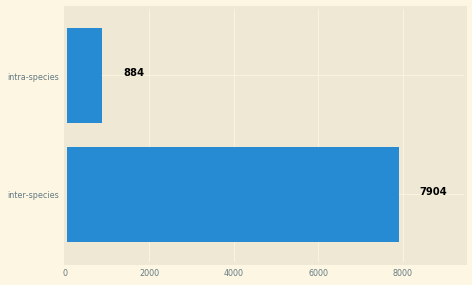

In [114]:
annotate_inter_intra(df_herpes)
df_inter_intra = df_herpes.copy()
df_herpes = df_herpes[df_herpes['inter-intra'] == 'inter-species']
df_herpes = df_herpes.reset_index(drop=True)
print('Original data set size:', df_inter_intra.shape[0], '\nOnly inter-species PPI:', 
      df_herpes.shape[0], '\nNumber of removed PPIs:', df_inter_intra.shape[0] - df_herpes.shape[0])
# inter-intra plot
height = df_inter_intra.groupby('inter-intra').size()
bars = df_inter_intra.groupby('inter-intra').size().index
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
for i in range(len(y_pos)):
    plt.text(x = height[i]+500 , y = y_pos[i], s = height[i], size = 10, fontweight = 'bold')
# plt.tight_layout(pad=0)
plt.margins(0.2, 0.1)
# plt.subplots_adjust(right=2.3)
plt.show()

All protein identifiers were mapped to `UniProtKB`s, except for a number of `intact:EBI`s, `entrez gene/locuslink`s  and `refseq`s for which no corresponding UniProtKB was found.

78 + 167 additional PPIs were removed because a) no valid mapping to UniProt accession numbers were found or b) multiple mappings were found. Retaining the latter would artificially inflate counts during frequent item set mining. 

In [115]:
id_mapper.map2uniprot(df_herpes, filepath=r'../../data/interim/mappings/')
df_herpes = id_mapper.remove_mult(df_herpes)

## adding
df_herpes.reset_index(inplace=True, drop=True)


unmapped = df_herpes.loc[~(df_herpes['xref_A'].str.contains('uniprotkb:') &
                           df_herpes['xref_B'].str.contains('uniprotkb:'))]
print('Unmapped proteins:',unmapped.shape[0])
df_herpes = df_herpes.loc[(df_herpes['xref_A'].str.contains('uniprotkb:') & # only select remapped entries
                           df_herpes['xref_B'].str.contains('uniprotkb:'))] 
# TO THIS BEFORE CREATING
df_herpes.reset_index(inplace=True, drop=True)
# re-create combined identifier
xref_partners_sorted_array = np.sort(np.stack((df_herpes.xref_A, df_herpes.xref_B), axis=1), axis=1)
xref_partners_df = pd.DataFrame(xref_partners_sorted_array, columns=['A', 'B'])
df_herpes['xref_partners_sorted'] = xref_partners_df['A'] + '%' + xref_partners_df['B']

Converted all found identifiers to UniProt ACs.
Omitted 167 PPIs due to the existance of multiple mappings.
Unmapped proteins: 78


Surprisingly, the re-mapping resulted in a number of new duplicates!

In [116]:
print(np.sum(df_herpes.duplicated(subset=['xref_partners_sorted'])), 'duplicated PPIs were removed.')
df_herpes = df_herpes.drop_duplicates(subset=['xref_partners_sorted'], keep='first')
df_herpes = df_herpes.reset_index(drop=True)

295 duplicated PPIs were removed.


For example, the following interaction was catalogued once for _Human herpesvirus 8 strain GK18_ and once for the higher order _Human gammaherpesvirus 8_. These issues could be resolved by filtering on PPI-partners **and** taxids.

In [117]:
display(df_herpes.loc[df_herpes.xref_partners_sorted=='uniprotkb:Q13547%uniprotkb:Q2HR82'])
display(df_concat.loc[df_concat.interaction_identifiers=='biogrid:669512'])
display(df_concat.loc[df_concat.interaction_identifiers=='intact:EBI-9006990|imex:IM-21800-6'])

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted,inter-intra
6,psi-mi:hdac1_human(display_long)|uniprotkb:HDAC1(gene name)|psi-mi:HDAC1(display_short)|uniprotkb:RPD3L1(gene name synonym),psi-mi:kbzip_hhv8p(display_long)|uniprotkb:K8(gene name)|psi-mi:K8(display_short),intact:EBI-301834|uniprotkb:Q92534,intact:EBI-9006943,Martínez et al. (2012),intact-miscore:0.43,psi-mi:MI:0006(anti bait coimmunoprecipitation),NaN,NaN,intact:EBI-9006990|imex:IM-21800-6,psi-mi:MI:0914(association),HPIDB2,NaN,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTV...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,human|Homo sapiens,VIRUS,hhv8p|Human herpesvirus 8,HDAC1_HUMAN,UNIPROT_AC:Q13547,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134|imex:IM-21800,UniProt,psi-mi:MI:0486(UniProt),taxid:9606,taxid:868565,uniprotkb:Q13547,uniprotkb:Q2HR82,uniprotkb:Q13547%uniprotkb:Q2HR82,inter-species


,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B
1775,entrez gene/locuslink:GON-10(gene name synonym)|entrez gene/locuslink:HD1(gene name synonym)|entrez gene/locuslink:RPD3(gene name synonym)|entrez gene/locuslink:RPD3L1(gene name synonym),-,biogrid:109315|entrez gene/locuslink:HDAC1|entrez gene/locuslink:RP4-811H24.2,biogrid:1776965|entrez gene/locuslink:K8|entrez gene/locuslink:HHV8GK18_gp54,Martinez FP (2012),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:669512,psi-mi:MI:0915(physical association),HPIDB2,NaN,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTV...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 8,HDAC1_HUMAN,UNIPROT_AC:Q13547,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:37296,entrez gene/locuslink:3065,entrez gene/locuslink:4961462


,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B
106,psi-mi:hdac1_human(display_long)|uniprotkb:HDAC1(gene name)|psi-mi:HDAC1(display_short)|uniprotkb:RPD3L1(gene name synonym),psi-mi:kbzip_hhv8p(display_long)|uniprotkb:K8(gene name)|psi-mi:K8(display_short),intact:EBI-301834|uniprotkb:Q92534,intact:EBI-9006943,Martínez et al. (2012),intact-miscore:0.43,psi-mi:MI:0006(anti bait coimmunoprecipitation),NaN,NaN,intact:EBI-9006990|imex:IM-21800-6,psi-mi:MI:0914(association),HPIDB2,NaN,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTV...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,human|Homo sapiens,VIRUS,hhv8p|Human herpesvirus 8,HDAC1_HUMAN,UNIPROT_AC:Q13547,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134|imex:IM-21800,UniProt,psi-mi:MI:0486(UniProt),taxid:9606,taxid:868565,uniprotkb:Q13547,uniprotkb:Q2HR82
108,psi-mi:hdac2_human(display_long)|uniprotkb:HDAC2(gene name)|psi-mi:HDAC2(display_short),psi-mi:kbzip_hhv8p(display_long)|uniprotkb:K8(gene name)|psi-mi:K8(display_short),intact:EBI-301821|uniprotkb:B4DL58|uniprotkb:E1P561|uniprotkb:B3KRS5|uniprotkb:Q5SRI8|uniprotkb:Q5SZ86|uniprotkb:Q8NEH4,intact:EBI-9006943,Martínez et al. (2012),intact-miscore:0.54,psi-mi:MI:0006(anti bait coimmunoprecipitation),NaN,NaN,intact:EBI-9006990|imex:IM-21800-6,psi-mi:MI:0914(association),HPIDB2,NaN,MAYSQGGGKKKVCYYYDGDIGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKATAEEMTKYHSDEYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVAGAVKLNRQQTDMAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMT...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,human|Homo sapiens,VIRUS,hhv8p|Human herpesvirus 8,HDAC2_HUMAN,UNIPROT_AC:Q92769,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134|imex:IM-21800,UniProt,psi-mi:MI:0486(UniProt),taxid:9606,taxid:868565,uniprotkb:Q92769,uniprotkb:Q2HR82


As a side-note: this also displays another discrepancy in the data set. The interaction `intact:EBI-9006990|imex:IM-21800-6` id is actually used for two separate PPIs, between _uniprotkb:Q13547_ & _uniprotkb:Q2HR82_ and between _uniprotkb:Q92769_ & _uniprotkb:Q2HR82_. The human proteins are Histone deacetylase 1/2 and the pathogen virus is a HHV-8 E3 SUMO-protein ligase. Due to our filtering on unique protein id - protein id pairs, this should not be an issue for us.

The majority of PPI interactions are of the type (physical) association.

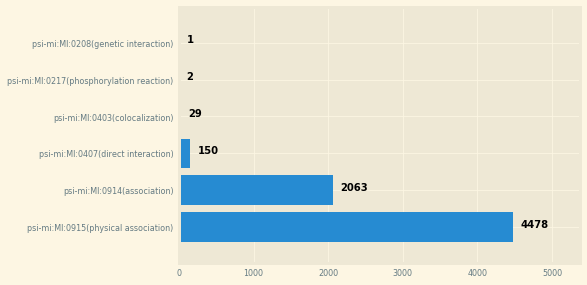

In [118]:
height = df_herpes['interaction_type'].value_counts()
bars = height.index
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
for i in range(len(y_pos)):
    plt.text(x = height[i]+100 , y = y_pos[i], s = height[i], size = 10, fontweight = 'bold')
plt.margins(0.2, 0.1)
plt.show()

### Taxonomic diversity of data set

The final data set consists of 7364 unique PPI between Herpesviridae and the following hosts:

In [119]:
all_taxids = df_herpes['taxid_A'].append(df_herpes['taxid_B']).unique()
host_taxids = list(np.setdiff1d(all_taxids, herpes_taxids))
host_list = []
for i in host_taxids:
    taxid = i.split(':')[1]
    count = df_herpes['xref_partners_sorted'].loc[(df_herpes['taxid_A'] == i) | (df_herpes['taxid_B'] == i)].shape[0]
    host_list.append({'Taxid' : taxid, 'Name' : taxid2name[taxid], 'Count' : count})
host_df = pd.DataFrame(host_list).sort_values('Count', ascending=False)
display(host_df)
reorder_pathogen_host_entries(df_herpes, host_taxids)

,Count,Name,Taxid
14,7035,Homo sapiens,9606
1,58,Rattus norvegicus,10116
0,29,Mus musculus,10090
17,23,Bos taurus,9913
9,7,Gallus gallus,9031
15,6,Equus caballus,9796
13,4,Pongo abelii,9601
16,3,Sus scrofa,9823
5,2,Caenorhabditis elegans,6239
11,2,Macaca fascicularis,9541


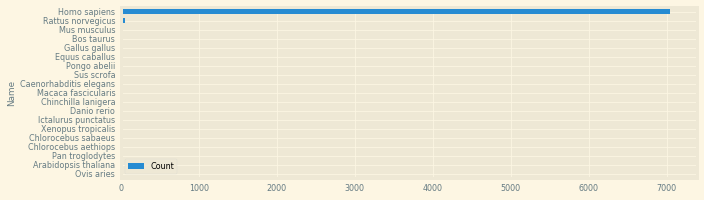

In [120]:
host_df.sort_values('Count').plot(x='Name',y='Count', kind="barh", width=0.5,figsize=(10, 3))
plt.tight_layout()
plt.show()

In [121]:
herpes_taxids = list(np.setdiff1d(all_taxids, host_taxids))
pathogen_list = []
for i in herpes_taxids:
    taxid = i.split(':')[1]
    count = df_herpes['xref_partners_sorted'].loc[(df_herpes['taxid_A'] == i) | (df_herpes['taxid_B'] == i)].shape[0]
    pathogen_list.append({'Taxid' : taxid, 'Name' : taxid2name[taxid], 'Count' : count})
path_df = pd.DataFrame(pathogen_list).sort_values('Count', ascending=False)
display(path_df)

,Count,Name,Taxid
24,2171,Human herpesvirus 4 strain B95-8,10377
45,2159,Epstein-barr virus strain ag876,82830
1,849,Herpes simplex virus (type 1 / strain 17),10299
37,409,Murid gammaherpesvirus 4,33708
40,386,Human gammaherpesvirus 8,37296
23,346,Human gammaherpesvirus 4,10376
48,262,Human herpesvirus 8 strain GK18,868565
41,190,Human herpesvirus 8 type M,435895
0,135,Human alphaherpesvirus 1,10298
38,87,Human herpesvirus 3 strain Oka vaccine,341980


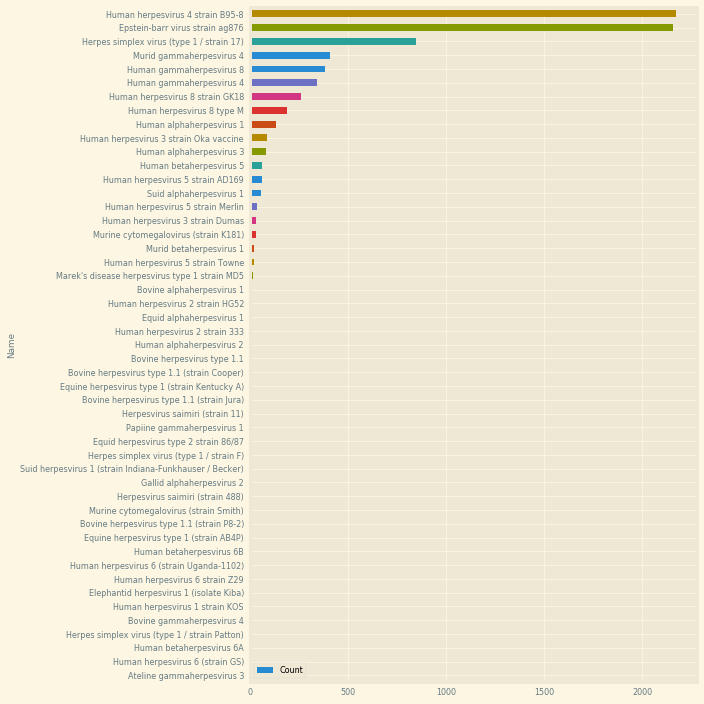

In [122]:
path_df.sort_values('Count').plot(x='Name',y='Count', kind="barh", width=0.5,figsize=(10, 10))
plt.tight_layout()
plt.show()

The viruses were also mapped to a higher taxonomic grouping for clarity.

In [123]:
taxid_nodes_path = Path(r'../../data/raw/taxdump/nodes.dmp')
taxid2parent, taxid2rank = retrieve_taxids.parse_taxid_nodes(str(taxid_nodes_path))
parent2child = retrieve_taxids.create_parent2child_dict(taxid2parent)
pathogen_group_dict = {'bovine_ah1': '10320', 'bovine_hv1': '79889', 'epstein_barr': '10376', 'equid_av1': '10326',
                       'equid_gv2': '12657', 'gallid_av2': '10390', 'human_hsv1': '10298', 'saimiri_gv2': '10381',
                       'human_av2': '10310', 'human_av3': '10335', 'human_bv5': '10359', 'human_gv8': '37296',
                       'human_bv6A': '32603', 'human_bv6B': '32604', 'murid_bv1': '10366', 'murid_gv4': '33708',
                       'papiine_gv1': '106332', 'suid_av1': '10345'}

for i, j in pathogen_group_dict.items():
    pathogen_group_dict[i] = [j] + retrieve_taxids.get_children(j, parent2child)

df_herpes['pathogen_groups'] = df_herpes.apply(lambda x: pathogen_group_mapper(x['taxid_B'].split(':')[1],
                                                                               pathogen_group_dict), axis=1)

In [124]:
df_herpes[df_herpes.pathogen_groups.isnull()]

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted,inter-intra,pathogen_groups
865,psi-mi:casp8_human(display_long)|uniprotkb:CASP8(gene name)|psi-mi:CASP8(display_short)|uniprotkb:MCH5(gene name synonym)|uniprotkb:ICE-like apoptotic protease 5(gene name synonym)|uniprotkb:MORT1...,psi-mi:q1xbr6_bhv4(display_long)|uniprotkb:ORF71(gene name)|psi-mi:ORF71(display_short)|uniprotkb:ORF 71(gene name synonym),intact:EBI-78060|uniprotkb:Q14793|uniprotkb:Q14794|uniprotkb:Q14795|uniprotkb:Q14796|uniprotkb:Q15780|uniprotkb:Q15806|uniprotkb:Q53TT5|uniprotkb:Q8TDI1|uniprotkb:Q8TDI2|uniprotkb:Q8TDI3|uniprotkb...,intact:EBI-11297213,Wang et al. (1997),intact-miscore:0.37,psi-mi:MI:0018(two hybrid),NaN,NaN,intact:EBI-11297221,psi-mi:MI:0915(physical association),HPIDB2,NaN,MDFSRNLYDIGEQLDSEDLASLKFLSLDYIPQRKQEPIKDALMLFQRLQEKRMLEESNLSFLKELLFRINRLDLLITYLNTRKEEMERELQTPGRAQISAYRVMLYQISEEVSRSELRSFKFLLQEEISKCKLDDDMNLLDIFIEMEKRVILGEGKLDILKRVCAQINKSLLKIINDYEEFSKERSSSLEGSPDEF...,MVTRDVLLAIETHLNQNEKTFVMYFLLDPYIPKECKDFLPTLENLHSKRKIRYPILIELMYILQRFDLLRSIFLLDHRFVKDQITSSHWKYISPYKQLIFSIGQNIDDEDLISIKFISMNYIGKSPSKIKNYLDWVRALEKVDMVGPDNLDLFETFFKQIHRMDIVKMIKNYRTRETLQITL,ANIMAL,human|Homo sapiens,VIRUS,BoHV-4|Bovine herpesvirus 4,CASP8_HUMAN,UNIPROT_AC:Q14790,Q1XBR6_BHV4,UNIPROT_AC:Q1XBR6,pubmed:9343261,HPIDB,psi-mi:MI:1335(HPIDb),taxid:9606,taxid:10385,uniprotkb:Q14790,uniprotkb:Q1XBR6,uniprotkb:Q14790%uniprotkb:Q1XBR6,inter-species,NaN
1287,psi-mi:lck_human(display_long)|uniprotkb:Protein YT16(gene name synonym)|uniprotkb:Proto-oncogene Lck(gene name synonym)|uniprotkb:T cell-specific protein-tyrosine kinase(gene name synonym)|unipro...,psi-mi:tio_athv3(display_long),intact:EBI-1348|uniprotkb:Q7RTZ3|uniprotkb:D3DPP8|uniprotkb:Q96DW4|uniprotkb:Q9NYT8|uniprotkb:P07100|uniprotkb:Q12850|uniprotkb:Q13152|uniprotkb:Q5TDH8|uniprotkb:Q5TDH9,intact:EBI-7709835|intact:MINT-7301078,Albrecht et al. (2005),intact-miscore:0.40,psi-mi:MI:0007(anti tag coimmunoprecipitation),NaN,NaN,intact:EBI-7709844|mint:MINT-7301088,psi-mi:MI:0915(physical association),HPIDB2,NaN,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRDPLVTYEGSNPPASPLQDNLVIALHSYEPSHDGDLGFEKGEQLRILEQSGEWWKAQSLTTGQEGFIPFNFVAKANSLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQNQGEVVKHYKIRNLDNGGFYISPR...,MANEPQEHEEGKPFFPPLGDSGEEGPPNIPQDPTPGTPPGPINSKNEDYPPPLENPGPNKSEGPPDGSGNSSPPVTMLVKNNGDRTKQDVSESGGNNSAPNSVESKHTSSSSSAGNGNETKCPDEQNTQECITTIYIPWEDAKPKLMGLVKLDSSDSEEERSPFNKYPKNYKKLRVDMGENWPPGIPPPQLPPRPA...,ANIMAL,human|Homo sapiens,VIRUS,athv-3|Ateline herpesvirus 3,LCK_HUMAN,UNIPROT_AC:P06239,TIO_ATHV3,UNIPROT_AC:Q9YJQ8,pubmed:16051843|mint:MINT-7216142|doi:10.1128/JVI.79.16.10507-10513.2005,MINT,psi-mi:MI:0471(MINT),taxid:9606,taxid:85618,uniprotkb:P06239,uniprotkb:Q9YJQ8,uniprotkb:P06239%uniprotkb:Q9YJQ8,inter-species,NaN
2817,psi-mi:erbin_human(display_long)|uniprotkb:ERBIN(gene name)|psi-mi:ERBIN(display_short)|uniprotkb:Densin-180-like protein(gene name synonym)|uniprotkb:ERBB2IP(gene name synonym)|uniprotkb:Erbb2-in...,psi-mi:trx2_elhvk(display_long)|uniprotkb:TRX2(gene name)|psi-mi:TRX2(display_short),intact:EBI-993903|uniprotkb:A0AVR1|uniprotkb:B4E3F1|uniprotkb:B7ZLV9|uniprotkb:E9PCR8|uniprotkb:Q1RMD0|uniprotkb:E7EQW9|uniprotkb:Q86W38|uniprotkb:Q9NR18|uniprotkb:Q9NW48|uniprotkb:Q9ULJ5,intact:EBI-11794578,Ivarsson et al. (2014),intact-miscore:0.40,psi-mi:MI:0084(phage display),NaN,NaN,intact:EBI-11794586|imex:IM-25074-14,psi-mi:MI:0915(physical association),HPIDB2,NaN,MTTKRSLFVRLVPCRCLRGEEETVTTLDYSHCSLEQVPKEIFTFEKTLEELYLDANQIEELPKQLFNCQSLHKLSLPDNDLTTLPASIANLINLRELDVSKNGIQEFPENIKNCKVLTIVEASVNPI

In [125]:
herpes_higher_list

array(['human_gv8', 'epstein_barr', 'human_hsv1', 'human_bv5', 'murid_bv1',
       'murid_gv4', 'human_av2', 'human_bv6A', 'human_bv6B', 'saimiri_gv2',
       'bovine_ah1', 'suid_av1', 'equid_av1', 'gallid_av2', 'equid_gv2',
       nan, 'human_av3', 'papiine_gv1'], dtype=object)

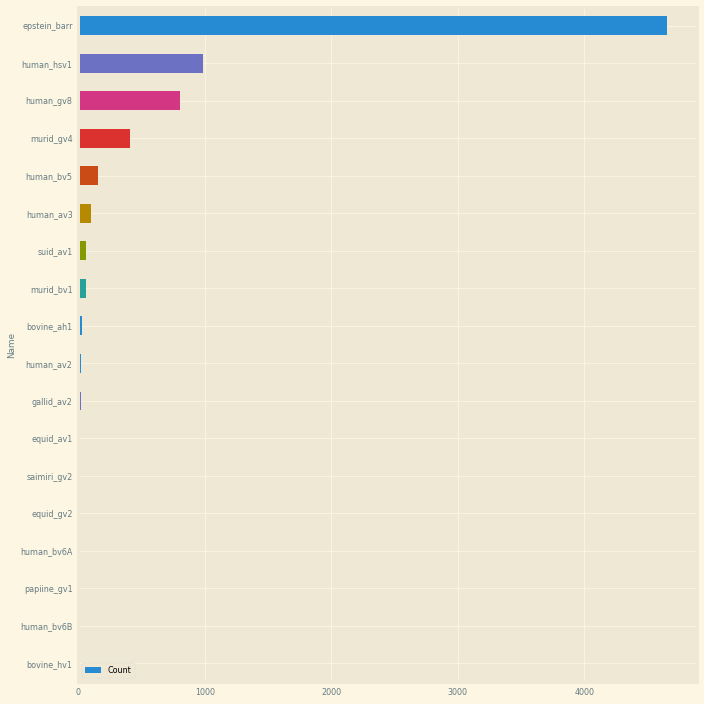

In [132]:
pathogen_higher_list = []
for i in pathogen_group_dict:
    taxid = pathogen_group_dict[i]
    count = df_herpes['xref_partners_sorted'].loc[(df_herpes['pathogen_groups'] == i)].shape[0]
    pathogen_higher_list.append({'Taxid' : taxid, 'Name' : i, 'Count' : count})
pathogen_higher_df = pd.DataFrame(pathogen_higher_list).sort_values('Count', ascending=False)
pathogen_higher_df.sort_values('Count').plot(x='Name',y='Count', kind="barh", width=0.5,figsize=(10, 10))
plt.tight_layout()
plt.show()

#### Inter-viral interactions

As was mentioned above, this data set only contains PPIs between different organisms, i.e. our intent was to collect host-pathogen interactions. To this end we merely filtered out interactions where both protein partners belonged to the same organism. However, 186 PPIs are actually interactions between two different viruses. Interestingly, the converse (PPIs between two hosts) never occurred.

In [127]:
print(df_herpes.loc[(df_herpes.taxid_A.isin(herpes_taxids) & df_herpes.taxid_B.isin(herpes_taxids)),:].shape[0])
print(df_herpes.loc[~(df_herpes.taxid_A.isin(herpes_taxids) | df_herpes.taxid_B.isin(herpes_taxids)),:].shape[0])

186
0


### Protein diversity

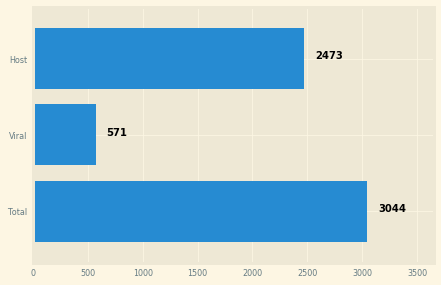

In [128]:
protein_set = set(df_herpes.xref_A.append(df_herpes.xref_B, ignore_index=True).str.extract('^.*:(\w*)-?',expand=False).unique())
viral_protein_set = set(df_herpes.xref_A[df_herpes.taxid_A.isin(herpes_taxids)].append(df_herpes.xref_B[df_herpes.taxid_B.isin(herpes_taxids)], ignore_index=True).str.extract('^.*:(\w*)-?',expand=False).unique())
host_protein_set = set(df_herpes.xref_A[df_herpes.taxid_A.isin(host_taxids)].append(df_herpes.xref_B[df_herpes.taxid_B.isin(host_taxids)], ignore_index=True).str.extract('^.*:(\w*)-?',expand=False).unique())
height = [len(x) for x in [protein_set, viral_protein_set, host_protein_set]]
bars = ['Total','Viral','Host']
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
for i in range(len(y_pos)):
    plt.text(x = height[i]+100 , y = y_pos[i], s = height[i], size = 10, fontweight = 'bold')
plt.margins(0.2, 0.1)
plt.show()

## Annotation data

### Gene Ontology

Each protein in the PPI data set was labeled with its Gene Ontology (GO) terms. All three namespaces were used: _biological process_, _molecular function_ and _cellular location_.

In [129]:
%%capture
go_dict = obo_tools.importOBO(r'../../data/raw/go_data/go.obo')
obo_tools.buildGOtree(go_dict, root_nodes=['GO:0008150', 'GO:0005575', 'GO:0003674'])
protein_set = set(df_herpes.xref_A.append(df_herpes.xref_B, ignore_index=True).str.extract('^.*:(\w*)-?',expand=False).unique())
gaf_dict = gaf_parser.importGAF(r'../../data/raw/go_data/gene_association_hosts_10292.goa', protein_set)
label_go.annotate_GO(df_herpes, gaf_dict)

114 proteins lacked any GO terms. The majority of these were viral.

In [130]:
not_annotated = [i for i in protein_set if i not in gaf_dict]
print(len(not_annotated), 'proteins lacked GO terms.')
a_multiset = collections.Counter(not_annotated)
b_multiset = collections.Counter(viral_protein_set)
overlap = list((a_multiset & b_multiset).elements())
print(len(overlap), 'proteins were of viral origin.')

114 proteins lacked GO terms.
84 proteins were of viral origin.


To reduce redundancy, all GO terms were remapped upwards to a specific depth. I.e. terms were made less specific to reduce the amount of unique terms. This *lower resolution* makes sense in this context because our ultimate goal was to find general similarities between various PPIs. If extremely specific labels were considered, very few frequently co-occurring terms would be found during the item set mining step of this analysis.

The following depths were selected, while excluding a number of terms that were deemed *too general*. We understand that this selection of terms seems arbitrary, but unfortunately the nature of the GO hierarchy does not lend itself to strict cut-offs. Indeed, the semantic content of a term with a depth of 4 in one branch, might be much higher than a term with depth 6 in another branch. Moreover, terms can have different depths depending on which branch is considered.

Note: the minimal depth was always assigned here. The depth of the root node was set to zero.

In [131]:
depth = {'biological_process': 2, 'molecular_function': 1, 'cellular_component': 1}
exclusion = {'GO:0005623': 'cell', 'GO:0005488': 'binding', 'GO:0043226': 'organelle',
             'GO:0044422': 'organelle part', 'GO:0044464': 'cell part', 'GO:0033643': 'host cell part',
             'GO:0033646': 'host intracellular part', 'GO:0043656': 'intracellular region of host',
             'GO:0043657': 'host cell', 'GO:0018995': 'host', 'GO:0044424': 'intracellular part',
             'GO:0016032': 'viral process', 'GO:0044215': 'other organism',
             'GO:0050789': 'regulation of biological process', 'GO:0005515': 'protein binding',
             'GO:0019012': 'virion', 'GO:0044423': 'virion part'}

A more nuanced approach would be to look at the information content of nodes to decide whether or not they should be included or excluded. See Alterovitz et al. (2007) and Mazandu & Mulder (2014) for more information. 

In [ ]:
label_go.remap_GO_depth(df_herpes, depth, go_dict, list(exclusion))
label_host_pathogen(df_herpes, herpes_taxids, columns=['xref_A_GO', 'xref_B_GO'],
                        taxid_columns=['taxid_A', 'taxid_B'])

In [174]:
not_annotated = [i for i in protein_set if i not in gaf_dict]
not_annotated

['Q96MD7',
 'Q6N095',
 'P88933',
 'Q76RG2',
 'Q8WY48',
 'F8REB8',
 'Q9QR71',
 'D0UZN0',
 'Q06093',
 'B9VXK6',
 'P03220',
 'Q7Z351',
 'O92597',
 'B3KR20',
 'P88987',
 'Q1HVI3',
 'Q1HVD9',
 'Q77NN9',
 'Q76RH5',
 'G3G913',
 'Q1HVB7',
 'P88940',
 'P89654',
 'P88993',
 'Q1HVH1',
 'Q77UV1',
 'Q91LX9',
 'Q2HRA1',
 'P10240',
 'P28282',
 'P88937',
 'Q9QJ12',
 'Q6QCP6',
 'P88950',
 'Q1HVC8',
 'P0CK56',
 'O41966',
 'O41958',
 'Q77PU6',
 'Q8IZ63',
 'Q4G0G2',
 'Q9HBX3',
 'F5HFD2',
 'Q6ZSJ8',
 'Q2HRC8',
 'Q30KQ2',
 'Q6N094',
 'Q8AZK8',
 'P0CK57',
 'Q5M9N0',
 'Q9Q2P1',
 'Q9HCM1',
 'Q8N0V1',
 'Q8TAS6',
 'P17589',
 'Q1HVE5',
 'O41952',
 'P88912',
 'Q1HVC2',
 'Q69132',
 'Q1HVD8',
 'Q2MG97',
 'Q9BU62',
 'D3XDZ0',
 'Q8NAK8',
 'Q7Z3E2',
 'Q2MG95',
 'D3ZH41',
 'D3XDW3',
 'O41941',
 'Q6QCT9',
 'Q8NDH2',
 'Q6N097',
 'Q2MG96',
 'D3XDR3',
 'Q96BQ5',
 'Q76RI6',
 'Q76SB3',
 'I2CNS4',
 'Q9H5V9',
 'Q6N089',
 'Q8AZJ5',
 'Q6IBN1',
 'A0A0C7TPJ3',
 'Q1HVF5',
 'Q1HVB5',
 'P08107',
 'O41939',
 'Q4JQU3',
 'P03199',
 'Q691

In [128]:
print(df_herpes.loc[(~df_herpes.xref_A.str.contains('uniprot')) |
                        (~df_herpes.xref_B.str.contains('uniprot'))].groupby('origin').size())

origin
HPIDB2         712
VirHostNet2    110
dtype: int64


In [100]:
print(df_concat.loc[(~df_concat.xref_A.str.contains('uniprot')) |
                        (~df_concat.xref_B.str.contains('uniprot'))])

                                                                                                                                                                                                      aliases_A  \
291                                                                                        psi-mi:f1m118_rat(display_short)|psi-mi:EBI-6880609(display_long)|uniprotkb:Dst(gene name)|psi-mi:Dst(display_short)   
292                                                                                        psi-mi:f1m118_rat(display_short)|psi-mi:EBI-6880609(display_long)|uniprotkb:Dst(gene name)|psi-mi:Dst(display_short)   
351      psi-mi:jak1_human(display_long)|uniprotkb:JAK1(gene name)|psi-mi:JAK1(display_short)|uniprotkb:JAK1A(gene name synonym)|uniprotkb:JAK1B(gene name synonym)|uniprotkb:Janus kinase 1(gene name synonym)   
353      psi-mi:jak1_human(display_long)|uniprotkb:JAK1(gene name)|psi-mi:JAK1(display_short)|uniprotkb:JAK1A(gene name synonym)|uniprotkb:JAK1B(gene name s

In [85]:
print(df_concat.groupby('origin').size())
print(np.sum(df_concat.duplicated(subset=['xref_partners_sorted'])))
print(df_concat.groupby('origin')['xref_partners_sorted'].nunique())
print(df_concat.xref_partners_sorted[df_concat.origin == 'HPIDB2'].nunique())


origin
HPIDB2         55505
PHISTO          7946
VirHostNet2    21482
dtype: int64
41483
origin
HPIDB2         42278
PHISTO          6521
VirHostNet2    18731
Name: xref_partners_sorted, dtype: int64
42278


In [96]:
print(df_concat.columns)
print(df_concat.groupby('origin').size())


Index(['aliases_A', 'aliases_B', 'alt_identifiers_A', 'alt_identifiers_B',
       'author', 'confidence_score', 'detection_method', 'display_id_A',
       'display_id_B', 'interaction_identifiers', 'interaction_type', 'origin',
       'pathogen', 'protein_seq1', 'protein_seq2', 'protein_taxid_1_cat',
       'protein_taxid_1_name', 'protein_taxid_2_cat', 'protein_taxid_2_name',
       'protein_xref_1_display_id', 'protein_xref_1_unique',
       'protein_xref_2_display_id', 'protein_xref_2_unique', 'publication',
       'source_database', 'source_database_ids', 'taxid_A', 'taxid_B',
       'xref_A', 'xref_B', 'xref_partners_sorted', 'inter-intra'],
      dtype='object')
origin
HPIDB2         55505
PHISTO          7946
VirHostNet2    21482
dtype: int64


28664

In [56]:
df_concat['xref_partners_sorted']

0             uniprotkb:P07339%uniprotkb:P13128
1             uniprotkb:P08603%uniprotkb:P16946
2             uniprotkb:P62820%uniprotkb:Q5ZWZ3
3             uniprotkb:P06400%uniprotkb:Q8VSP9
4             uniprotkb:P06400%uniprotkb:Q8VSP9
5             uniprotkb:P06400%uniprotkb:Q6XW12
6             uniprotkb:A8VZX9%uniprotkb:O80480
7             uniprotkb:P06731%uniprotkb:Q7BG35
8             uniprotkb:P06731%uniprotkb:Q57254
9             uniprotkb:P09486%uniprotkb:Q2TV77
10            uniprotkb:P09486%uniprotkb:Q2TV77
11            uniprotkb:P09486%uniprotkb:Q2TV77
12            uniprotkb:P22518%uniprotkb:Q5ZRQ0
13            uniprotkb:P22518%uniprotkb:Q5ZRQ0
14            uniprotkb:P22518%uniprotkb:Q5ZRQ0
15            uniprotkb:A8E1U6%uniprotkb:P24071
16        uniprotkb:A0A0H2ZTM2%uniprotkb:P60953
17        uniprotkb:A0A0H3A2T3%uniprotkb:P60953
18        uniprotkb:A0A0H3A1L5%uniprotkb:P60953
19            uniprotkb:P03409%uniprotkb:Q9UBN7
20            uniprotkb:P03409%uniprotkb

%%bash
printf 'HPIDB2:\n'
tail -n +2 ../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u
printf "\nVirHostNet:\n"
tail -n +2 ../../data/raw/ppi_data/VirHostNet_January_2017.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u

In [7]:
%%bash
cat <(tail -n +2  ../data/raw/ppi_data/hpidb2_March14_2017_mitab.txt | cut -f10) <(tail -n +2 ../data/raw/ppi_data/hpidb2_March14_2017_mitab.txt | cut -f11) | sed -E 's/taxid:([[:digit:]]+).*/\1/g' | sort -u

10029
10036
10090
10116
10141
10243
10245
10249
10254
10269
10273
10280
10298
10299
10304
10306
10308
10310
10313
10315
10320
10323
10324
10326
10329
10335
10345
10359
10360
10363
10366
10367
10370
10376
10377
10383
10384
10385
10389
10390
103904
103929
10407
10450
10497
10498
10515
10527
10529
10530
10533
10553
10559
10560
10579
10580
10583
10585
10586
10587
10588
10593
10595
10598
10600
10602
10614
10617
10621
10623
10632
10635
10636
10637
10641
10643
106820
10684
10710
10714
10884
10886
10900
10915
10970
11033
11034
11036
11041
11043
11044
11045
11049
11053
11059
11060
11065
11070
11072
11077
11078
11082
11084
11085
11096
11097
11098
11099
11100
11103
11104
11105
11108
11113
11116
1111708
11122
11142
11167
11171
11195
11198
11208
11212
11214
11215
11232
11233
11234
11235
11241
11250
11259
11273
11276
11284
11285
1140
11484
11553
11589
11590
11599
11602
11608
11619
11622
11624
11628
11641
11660
11665
11670
11673
11676
11678
11679
1168
11685
11686
11689
11691
11696
11698
11706
11707
1

### Number of columns in data set

In [15]:
%%bash
head -1 ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | awk -F'\t' '{print NF }'

26


What if there are some lines with more/fewer entries?

In [13]:
%%bash
awk -F'\t' '{print NF}' ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | sort -nu | tail -n 1

26


Listing column names

In [16]:
%%bash
awk -F'\t' ' { for (i = 1; i <= NF; ++i) print i, $i; exit } ' ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt

1 # protein_xref_1
2 protein_xref_2
3 alternative_identifiers_1
4 alternative_identifiers_2
5 protein_alias_1
6 protein_alias_2
7 detection_method
8 author_name
9 pmid
10 protein_taxid_1
11 protein_taxid_2
12 interaction_type
13 source_database_id
14 database_identifier
15 confidence
16 protein_xref_1_unique
17 protein_xref_2_unique
18 protein_taxid_1_cat
19 protein_taxid_2_cat
20 protein_taxid_1_name
21 protein_taxid_2_name
22 protein_seq1
23 protein_seq2
24 source_database
25 protein_xref_1_display_id
26 protein_xref_2_display_id


### Retrieve data sources

In [1]:
%%bash
tail -n +2 ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u

ensembl
entrez gene/locuslink
intact
uniprotkb


### Number of Entrez genes

In [2]:
%%bash
cat <(cut -f1 ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt) <(cut -f2 ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt) | grep entrez | sort -u | sed -rn 's/^.*:(.*)/\1/p' | wc -l

3044


## Check overlap between data sets
First column shows unique values for Phisto, second for HPIDB2 and third is shared.

In [2]:
%%bash
comm <(cut -f3 -d, ../data/raw/ppi_data/phisto_Jan19_2017.csv | sed 's/"//g' | sort -u ) <(cut -f2 ../data/raw/ppi_data/hpidb2_March14_2017_mitab.txt | sed s/uniprotkb://g | sort -u)

	A0A024A2C9
	A0A088QCN4
	A0A088QCP6
	A0A088QCP8
	A0A088QCQ2
	A0A088QCQ8
	A0A088QCS4
	A0A088QCS8
	A0A088QCT3
	A0A088QCT7
	A0A088QCU2
	A0A088QCU5
	A0A088QD14
	A0A088QD18
	A0A088QD22
	A0A088QD27
	A0A088QD33
	A0A088QD42
	A0A088QD46
	A0A088QD54
	A0A088QD58
	A0A088QD59
	A0A088QD63
	A0A088QD64
	A0A088QD73
	A0A088QD79
	A0A088QD82
	A0A088QD87
	A0A088QD91
	A0A088QD96
	A0A088QF47
	A0A088QF49
	A0A088QF61
	A0A088QF67
	A0A088QF78
	A0A088QF82
	A0A088QF87
	A0A088QF89
	A0A088QF94
	A0A088QF98
	A0A088QTU0
	A0A088QTU4
	A0A088QTV3
	A0A088QTW6
	A0A088QTX5
	A0A088QTX9
	A0A088QTY6
	A0A089NDG7
	A0A0C7TPJ3
	A0A0F6B063
	A0A0F6B1Q8
	A0A0F7R416
	A0A0F7R9M2
	A0A0F7R9R7
	A0A0F7RBN8
	A0A0F7RDC0
	A0A0F7REZ1
	A0A0F7RG28
	A0A0F7RG58
	A0A0F7RI40
	A0A0F7RKT3
	A0A0H2VBI7
	A0A0H2X3D0
	A0A0H2ZTM2
	A0A0H3A1L5
	A0A0H3A2T3
	A0A0H3JFN8
	A0A0H3JGR6
	A0A0H3LYM0
	A0A0H3NA16
	A0A0H3NB75
	A0A0H3NDL6
	A0A0H3NF38
	A0A0H3NG92
	A0A0H3NGI8
	A0A0H3NGY5
	A0A0H3NMJ6
	A0A142I9X8
	A0A173DS53
	A0A1A9IFF4
	A0A1A9IJH2
	A0MPS7
	A1S3N8
		A1Z0Q5
	A2

# References
- Ammari, Mais G., Cathy R. Gresham, Fiona M. McCarthy, and Bindu Nanduri. 2016. "HPIDB 2.0: A Curated Database For Host–Pathogen Interactions". Database 2016: baw103. doi:10.1093/database/baw103.
- Guirimand, T., S. Delmotte, and V. Navratil. 2014. "Virhostnet 2.0: Surfing On The Web Of Virus/Host Molecular Interactions Data". Nucleic Acids Research 43 (D1): D583-D587. doi:10.1093/nar/gku1121.
- Durmuş Tekir, Saliha, Tunahan Çakır, Emre Ardıç, Ali Semih Sayılırbaş, Gökhan Konuk, Mithat Konuk, and Hasret Sarıyer et al. 2013. "PHISTO: Pathogen–Host Interaction Search Tool". Bioinformatics 29 (10): 1357-1358. doi:10.1093/bioinformatics/btt137.
- Smith, Barry, Michael Ashburner, Cornelius Rosse, Jonathan Bard, William Bug, Werner Ceusters, and Louis J Goldberg et al. 2007. "The OBO Foundry: Coordinated Evolution Of Ontologies To Support Biomedical Data Integration". Nature Biotechnology 25 (11): 1251-1255. doi:10.1038/nbt1346.
- Alterovitz, Gil, Michael Xiang, Mamta Mohan, and Marco F. Ramoni. 2006. "GO Pad: The Gene Ontology Partition Database". Nucleic Acids Research 35 (suppl_1): D322-D327. doi:10.1093/nar/gkl799.
- Mazandu, Gaston K., and Nicola J. Mulder. 2014. "Information Content-Based Gene Ontology Functional Similarity Measures: Which One To Use For A Given Biological Data Type?". Plos ONE 9 (12): e113859. doi:10.1371/journal.pone.0113859.